In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [2]:
data = df['High']
data.head()

Date
2014-09-29    100.690002
2014-10-06    102.379997
2014-10-13    101.779999
2014-10-20    105.489998
2014-10-27    108.040001
Name: High, dtype: float64

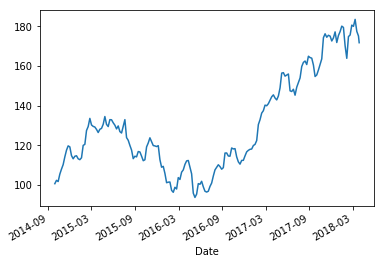

In [3]:
%matplotlib inline
data.plot()

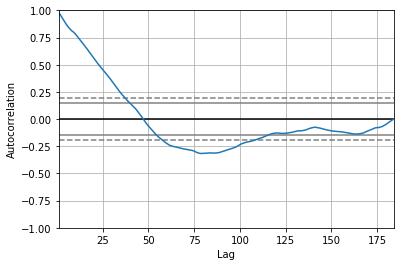

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)

C:\Users\xfang13\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\xfang13\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                  183
Model:                ARIMA(10, 1, 0)   Log Likelihood                -466.246
Method:                       css-mle   S.D. of innovations              3.089
Date:                Mon, 29 Oct 2018   AIC                            956.493
Time:                        11:46:15   BIC                            995.006
Sample:                             1   HQIC                           972.104
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3948      0.227      1.740      0.084      -0.050       0.839
ar.L1.D.High      0.2180      0.074      2.957      0.004       0.074       0.363
ar.L2.D.High     -0.0044      0.075     

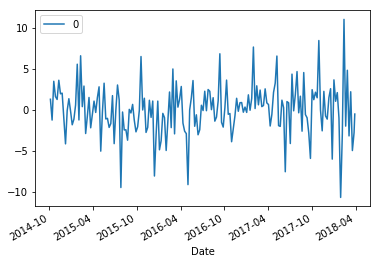

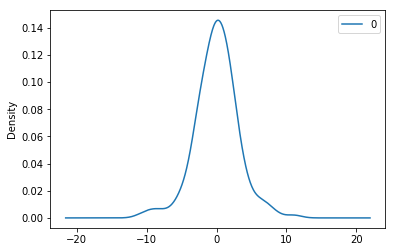

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
%matplotlib inline
# fit model
model = ARIMA(data, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

predicted=140.679136, expected=141.020004
predicted=140.584809, expected=142.800003
predicted=143.968279, expected=144.500000
predicted=144.690015, expected=145.460007
predicted=145.911472, expected=143.880005
predicted=143.419073, expected=142.919998
predicted=142.534463, expected=144.899994
predicted=145.713418, expected=148.979996
predicted=150.119800, expected=156.419998
predicted=159.231735, expected=156.649994
predicted=157.135998, expected=154.899994
predicted=154.025035, expected=155.449997
predicted=156.328901, expected=155.979996
predicted=155.748293, expected=147.500000
predicted=145.380840, expected=147.160004
predicted=147.480755, expected=148.279999
predicted=149.357415, expected=145.300003
predicted=143.509225, expected=149.330002
predicted=151.962134, expected=151.740005
predicted=152.009231, expected=153.990005
predicted=154.743449, expected=159.750000
predicted=162.503147, expected=161.830002
predicted=161.468583, expected=162.509995
predicted=163.762699, expected=160

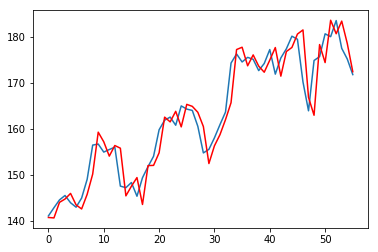

In [6]:
#Forecasting
%matplotlib inline
from sklearn.metrics import mean_squared_error
X = data.values
split = int(X.size * 0.7)
train, test = X[:split], X[split:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')

In [7]:
output

(array([172.37881621]),
 array([3.09733487]),
 array([[166.30815141, 178.44948101]]))